In [0]:














from pyspark.sql.types import IntegerType,FloatType
ath='/FileStore/tables/data-1.csv'
df=spark.read.format('csv').option('header' ,'true').option('inferSchema', 'true').load(ath)
df.show(10)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
InvoiceNo|StockCode| Description|Quantity| InvoiceDate|UnitPrice|CustomerID| Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
 536365| 85123A|WHITE HANGING HEA...| 6|12/1/2010 8:26| 2.55| 17850|United Kingdom|
 536365| 71053| WHITE METAL LANTERN| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|
 536365| 84406B|CREAM CUPID HEART...| 8|12/1/2010 8:26| 2.75| 17850|United Kingdom|
 536365| 84029G|KNITTED UNION FLA...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|
 536365| 84029E|RED WOOLLY HOTTIE...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|
 536365| 22752|SET 7 BABUSHKA NE...| 2|12/1/2010 8:26| 7.65| 17850|United Kingdom|
 536365| 21730|GLASS STAR FROSTE...| 6|12/1/2010 8:26| 4.25| 17850|United Kingdom|
 536366| 22633|HAND WARMER UNION...| 6|12/1/2010 8:28| 1.85| 17850|United Kingdom|
 536366| 22632|HAND WARMER RED P...| 6|12/1/2010 8:28| 1.85| 17850|United Kingdom|
 536367| 84879|ASSORTED COLOUR B...| 32|12/1/2010 8:34| 1.69| 13047|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 10 rows

In [0]:
df.columns

Out[2]: ['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [0]:
df.printSchema()

root
-- InvoiceNo: string (nullable = true)
-- StockCode: string (nullable = true)
-- Description: string (nullable = true)
-- Quantity: integer (nullable = true)
-- InvoiceDate: string (nullable = true)
-- UnitPrice: double (nullable = true)
-- CustomerID: integer (nullable = true)
-- Country: string (nullable = true)

In [0]:
print((df.count(), len(df.columns)))

(541909, 8)

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import unix_timestamp, col
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df=df.withColumn("Quantity", df["Quantity"].cast(IntegerType()))
df=df.withColumn("Date", to_date(unix_timestamp("InvoiceDate", "MM/dd/yyyy").cast("timestamp")))
df = df.withColumn("Total_price", df["UnitPrice"] * df["Quantity"])
df = df.withColumn('Day',dayofmonth(df.Date))
df = df.withColumn('month',month(df.Date))
df = df.withColumn('weekday',dayofweek(df.Date))


In [0]:
df.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
InvoiceNo|StockCode| Description|Quantity| InvoiceDate|UnitPrice|CustomerID| Country| Date| Total_price|Day|month|weekday|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
 536365| 85123A|WHITE HANGING HEA...| 6|12/1/2010 8:26| 2.55| 17850|United Kingdom|2010-12-01|15.299999999999999| 1| 12| 4|
 536365| 71053| WHITE METAL LANTERN| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 84406B|CREAM CUPID HEART...| 8|12/1/2010 8:26| 2.75| 17850|United Kingdom|2010-12-01| 22.0| 1| 12| 4|
 536365| 84029G|KNITTED UNION FLA...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 84029E|RED WOOLLY HOTTIE...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
only showing top 5 rows

In [0]:
df.describe('UnitPrice','Quantity').show()

+-------+------------------+------------------+
summary| UnitPrice| Quantity|
+-------+------------------+------------------+
 count| 541909| 541909|
 mean|4.6111136260897085| 9.55224954743324|
 stddev| 96.75985306117963|218.08115785023438|
 min| -11062.06| -80995|
 max| 38970.0| 80995|
+-------+------------------+------------------+

In [0]:
s=df.groupby('CustomerID').sum('Quantity')
s.agg({'sum(Quantity)':'min'}).show()

+------------------+
min(sum(Quantity))|
+------------------+
 -303|
+------------------+

In [0]:
neg_1=df[df['Quantity']<0]
neg_1.show(5)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+----------+-------------------+---+-----+-------+
InvoiceNo|StockCode| Description|Quantity| InvoiceDate|UnitPrice|CustomerID| Country| Date| Total_price|Day|month|weekday|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+----------+-------------------+---+-----+-------+
 C536379| D| Discount| -1| 12/1/2010 9:41| 27.5| 14527|United Kingdom|2010-12-01| -27.5| 1| 12| 4|
 C536383| 35004C|SET OF 3 COLOURED...| -1| 12/1/2010 9:49| 4.65| 15311|United Kingdom|2010-12-01| -4.65| 1| 12| 4|
 C536391| 22556|PLASTERS IN TIN C...| -12|12/1/2010 10:24| 1.65| 17548|United Kingdom|2010-12-01|-19.799999999999997| 1| 12| 4|
 C536391| 21984|PACK OF 12 PINK P...| -24|12/1/2010 10:24| 0.29| 17548|United Kingdom|2010-12-01| -6.959999999999999| 1| 12| 4|
 C536391| 21983|PACK OF 12 BLUE P...| -24|12/1/2010 10:24| 0.29| 17548|United Kingdom|2010-12-01| -6.959999999999999| 1| 12| 4|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+----------+-------------------+---+-----+-------+
only showing top 5 rows

In [0]:
neg_1.select(countDistinct('InvoiceNo')).show()

+-------------------------+
count(DISTINCT InvoiceNo)|
+-------------------------+
 5172|
+-------------------------+

In [0]:
df.createOrReplaceTempView('For_negative')

In [0]:
%sql
select Description,CustomerID,count(InvoiceNo),InvoiceNo from For_negative group by CustomerID,Description,InvoiceNo;

Description,CustomerID,count(InvoiceNo),InvoiceNo
WOODEN PICTURE FRAME WHITE FINISH,17850,1,536396
HOME BUILDING BLOCK WORD,14307,1,536408
PINK UNION JACK LUGGAGE TAG,17908,1,536409
NAMASTE SWAGAT INCENSE,13694,1,536437
ROTATING SILVER ANGELS T-LIGHT HLDR,15983,1,536446
MEASURING TAPE BABUSHKA RED,15525,2,536528
STAR WOODEN CHRISTMAS DECORATION,16274,1,536569
HAND WARMER BABUSHKA DESIGN,17690,1,536578
IVORY EMBROIDERED QUILT,17850,1,536600
RETROSPOT GIANT TUBE MATCHES,13418,1,536624


In [0]:
df_1=df[df['Quantity']>0]

In [0]:
df_1.describe('UnitPrice','Quantity').show()

+-------+------------------+------------------+
summary| UnitPrice| Quantity|
+-------+------------------+------------------+
 count| 531285| 531285|
 mean|3.8572962797755093|10.655262241546438|
 stddev|41.810047174591496|156.83032303670882|
 min| -11062.06| 1|
 max| 13541.33| 80995|
+-------+------------------+------------------+

In [0]:
neg_P=df_1[df_1['UnitPrice']<0]
neg_P.show()

+---------+---------+---------------+--------+---------------+---------+----------+--------------+----------+-----------+---+-----+-------+
InvoiceNo|StockCode| Description|Quantity| InvoiceDate|UnitPrice|CustomerID| Country| Date|Total_price|Day|month|weekday|
+---------+---------+---------------+--------+---------------+---------+----------+--------------+----------+-----------+---+-----+-------+
 A563186| B|Adjust bad debt| 1|8/12/2011 14:51|-11062.06| null|United Kingdom|2011-08-12| -11062.06| 12| 8| 6|
 A563187| B|Adjust bad debt| 1|8/12/2011 14:52|-11062.06| null|United Kingdom|2011-08-12| -11062.06| 12| 8| 6|
+---------+---------+---------------+--------+---------------+---------+----------+--------------+----------+-----------+---+-----+-------+

In [0]:
df_2=df_1[df_1['UnitPrice']>0]
df_2.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
InvoiceNo|StockCode| Description|Quantity| InvoiceDate|UnitPrice|CustomerID| Country| Date| Total_price|Day|month|weekday|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
 536365| 85123A|WHITE HANGING HEA...| 6|12/1/2010 8:26| 2.55| 17850|United Kingdom|2010-12-01|15.299999999999999| 1| 12| 4|
 536365| 71053| WHITE METAL LANTERN| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 84406B|CREAM CUPID HEART...| 8|12/1/2010 8:26| 2.75| 17850|United Kingdom|2010-12-01| 22.0| 1| 12| 4|
 536365| 84029G|KNITTED UNION FLA...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 84029E|RED WOOLLY HOTTIE...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 22752|SET 7 BABUSHKA NE...| 2|12/1/2010 8:26| 7.65| 17850|United Kingdom|2010-12-01| 15.3| 1| 12| 4|
 536365| 21730|GLASS STAR FROSTE...| 6|12/1/2010 8:26| 4.25| 17850|United Kingdom|2010-12-01| 25.5| 1| 12| 4|
 536366| 22633|HAND WARMER UNION...| 6|12/1/2010 8:28| 1.85| 17850|United Kingdom|2010-12-01|11.100000000000001| 1| 12| 4|
 536366| 22632|HAND WARMER RED P...| 6|12/1/2010 8:28| 1.85| 17850|United Kingdom|2010-12-01|11.100000000000001| 1| 12| 4|
 536367| 84879|ASSORTED COLOUR B...| 32|12/1/2010 8:34| 1.69| 13047|United Kingdom|2010-12-01| 54.08| 1| 12| 4|
 536367| 22745|POPPY'S PLAYHOUSE...| 6|12/1/2010 8:34| 2.1| 13047|United Kingdom|2010-12-01|12.600000000000001| 1| 12| 4|
 536367| 22748|POPPY'S PLAYHOUSE...| 6|12/1/2010 8:34| 2.1| 13047|United Kingdom|2010-12-01|12.600000000000001| 1| 12| 4|
 536367| 22749|FELTCRAFT PRINCES...| 8|12/1/2010 8:34| 3.75| 13047|United Kingdom|2010-12-01| 30.0| 1| 12| 4|
 536367| 22310|IVORY KNITTED MUG...| 6|12/1/2010 8:34| 1.65| 13047|United Kingdom|2010-12-01| 9.899999999999999| 1| 12| 4|
 536367| 84969|BOX OF 6 ASSORTED...| 6|12/1/2010 8:34| 4.25| 13047|United Kingdom|2010-12-01| 25.5| 1| 12| 4|
 536367| 22623|BOX OF VINTAGE JI...| 3|12/1/2010 8:34| 4.95| 13047|United Kingdom|2010-12-01|14.850000000000001| 1| 12| 4|
 536367| 22622|BOX OF VINTAGE AL...| 2|12/1/2010 8:34| 9.95| 13047|United Kingdom|2010-12-01| 19.9| 1| 12| 4|
 536367| 21754|HOME BUILDING BLO...| 3|12/1/2010 8:34| 5.95| 13047|United Kingdom|2010-12-01| 17.85| 1| 12| 4|
 536367| 21755|LOVE BUILDING BLO...| 3|12/1/2010 8:34| 5.95| 13047|United Kingdom|2010-12-01| 17.85| 1| 12| 4|
 536367| 21777|RECIPE BOX WITH M...| 4|12/1/2010 8:34| 7.95| 13047|United Kingdom|2010-12-01| 31.8| 1| 12| 4|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
only showing top 20 rows

In [0]:
%sql
select UnitPrice from For_negative

UnitPrice
2.55
3.39
2.75
3.39
3.39
7.65
4.25
1.85
1.85
1.69


In [0]:
%sql
select UnitPrice from For_negative

UnitPrice
2.55
3.39
2.75
3.39
3.39
7.65
4.25
1.85
1.85
1.69


In [0]:
%sql
select Quantity from For_negative

Quantity
6
6
8
6
6
2
6
6
6
32


In [0]:
%sql
select Quantity from For_negative

Quantity
6
6
8
6
6
2
6
6
6
32


In [0]:
%sql
select Total_Price from For_negative

Total_Price
15.299999999999999
20.34
22.0
20.34
20.34
15.3
25.5
11.100000000000001
11.100000000000001
54.08


In [0]:

import pyspark.sql.functions as F
def count_missings(spark_df,sort=True):
    """
    Counts number of nulls and nans in each column
    """
    dff = spark_df.select([F.count(F.when(F.isnan(c) | F.isnull(c), c)).alias(c) for (c,c_type) in spark_df.dtypes if c_type not  in ('date', 'string', 'date')]).toPandas()

    if len(dff) == 0:
        print("There are no any missing values!")
        return None

    if sort:
        return dff.rename(index={0: 'count'}).T.sort_values("count",ascending=False)

    return dff
count_missings(df_2)

Out[16]:

,count
CustomerID,132220
Quantity,0
UnitPrice,0
Total_price,0
Day,0
month,0
weekday,0


In [0]:
df_2=df_2.na.drop()
df_2.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
InvoiceNo|StockCode| Description|Quantity| InvoiceDate|UnitPrice|CustomerID| Country| Date| Total_price|Day|month|weekday|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
 536365| 85123A|WHITE HANGING HEA...| 6|12/1/2010 8:26| 2.55| 17850|United Kingdom|2010-12-01|15.299999999999999| 1| 12| 4|
 536365| 71053| WHITE METAL LANTERN| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 84406B|CREAM CUPID HEART...| 8|12/1/2010 8:26| 2.75| 17850|United Kingdom|2010-12-01| 22.0| 1| 12| 4|
 536365| 84029G|KNITTED UNION FLA...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 84029E|RED WOOLLY HOTTIE...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 22752|SET 7 BABUSHKA NE...| 2|12/1/2010 8:26| 7.65| 17850|United Kingdom|2010-12-01| 15.3| 1| 12| 4|
 536365| 21730|GLASS STAR FROSTE...| 6|12/1/2010 8:26| 4.25| 17850|United Kingdom|2010-12-01| 25.5| 1| 12| 4|
 536366| 22633|HAND WARMER UNION...| 6|12/1/2010 8:28| 1.85| 17850|United Kingdom|2010-12-01|11.100000000000001| 1| 12| 4|
 536366| 22632|HAND WARMER RED P...| 6|12/1/2010 8:28| 1.85| 17850|United Kingdom|2010-12-01|11.100000000000001| 1| 12| 4|
 536367| 84879|ASSORTED COLOUR B...| 32|12/1/2010 8:34| 1.69| 13047|United Kingdom|2010-12-01| 54.08| 1| 12| 4|
 536367| 22745|POPPY'S PLAYHOUSE...| 6|12/1/2010 8:34| 2.1| 13047|United Kingdom|2010-12-01|12.600000000000001| 1| 12| 4|
 536367| 22748|POPPY'S PLAYHOUSE...| 6|12/1/2010 8:34| 2.1| 13047|United Kingdom|2010-12-01|12.600000000000001| 1| 12| 4|
 536367| 22749|FELTCRAFT PRINCES...| 8|12/1/2010 8:34| 3.75| 13047|United Kingdom|2010-12-01| 30.0| 1| 12| 4|
 536367| 22310|IVORY KNITTED MUG...| 6|12/1/2010 8:34| 1.65| 13047|United Kingdom|2010-12-01| 9.899999999999999| 1| 12| 4|
 536367| 84969|BOX OF 6 ASSORTED...| 6|12/1/2010 8:34| 4.25| 13047|United Kingdom|2010-12-01| 25.5| 1| 12| 4|
 536367| 22623|BOX OF VINTAGE JI...| 3|12/1/2010 8:34| 4.95| 13047|United Kingdom|2010-12-01|14.850000000000001| 1| 12| 4|
 536367| 22622|BOX OF VINTAGE AL...| 2|12/1/2010 8:34| 9.95| 13047|United Kingdom|2010-12-01| 19.9| 1| 12| 4|
 536367| 21754|HOME BUILDING BLO...| 3|12/1/2010 8:34| 5.95| 13047|United Kingdom|2010-12-01| 17.85| 1| 12| 4|
 536367| 21755|LOVE BUILDING BLO...| 3|12/1/2010 8:34| 5.95| 13047|United Kingdom|2010-12-01| 17.85| 1| 12| 4|
 536367| 21777|RECIPE BOX WITH M...| 4|12/1/2010 8:34| 7.95| 13047|United Kingdom|2010-12-01| 31.8| 1| 12| 4|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
only showing top 20 rows

In [0]:
df.describe('Total_Price').show()

+-------+-----------------+
summary| Total_Price|
+-------+-----------------+
 count| 541909|
 mean|17.98779487699803|
 stddev|378.8108235059749|
 min| -168469.6|
 max| 168469.6|
+-------+-----------------+

In [0]:
 df_2.stat.corr('Quantity', 'Total_price')

Out[19]: 0.9143874178501636

In [0]:
df_2.createOrReplaceTempView('Ecommerce')

In [0]:
df_2.select(countDistinct('Country') ).show()

+-----------------------+
count(DISTINCT Country)|
+-----------------------+
 37|
+-----------------------+

In [0]:
%sql
select sum(Total_price) as Revenue,Country from Ecommerce group by Country order by Revenue asc LIMIT 7;


Revenue,Country
145.92,Saudi Arabia
548.4,Bahrain
826.74,Czech Republic
1002.3099999999998,RSA
1143.6000000000001,Brazil
1300.2499999999998,European Community
1661.06,Lithuania


In [0]:
%sql
select sum(Total_price) as Revenue,Country from Ecommerce group by Country order by Revenue asc LIMIT 7;

Revenue,Country
145.92,Saudi Arabia
548.4,Bahrain
826.74,Czech Republic
1002.3099999999998,RSA
1143.6000000000001,Brazil
1300.2499999999998,European Community
1661.06,Lithuania


In [0]:
%sql
select count(InvoiceNo) as No_of_orders,Country from Ecommerce group by Country order by No_of_orders asc LIMIT 7;


No_of_orders,Country
9,Saudi Arabia
17,Bahrain
25,Czech Republic
32,Brazil
35,Lithuania
45,Lebanon
57,RSA


In [0]:
%sql
select count(InvoiceNo) as No_of_orders,Country,sum(Total_price) as Revenue from Ecommerce group by Country order by No_of_orders desc;

No_of_orders,Country,Revenue
354321,United Kingdom,7308391.55399994
9040,Germany,228867.1400000001
8341,France,209024.05000000002
7236,EIRE,265545.89999999997
2484,Spain,61577.110000000015
2359,Netherlands,285446.33999999997
2031,Belgium,41196.34000000001
1841,Switzerland,56443.94999999997
1462,Portugal,33439.89
1182,Australia,138521.31


In [0]:
%sql
select count(InvoiceNo) as No_of_orders,month, sum(Total_price) as Revenue from Ecommerce group by month ;

No_of_orders,month,Revenue
43461,12,1090906.6800000183
21229,1,569445.0400000123
27175,3,595500.760000013
22642,4,469200.36100000725
19927,2,447137.3500000165
27185,6,661213.6900000032
28320,5,678594.5600000018
27007,8,645343.900000004
26825,7,600091.0110000141
40028,9,952838.3819999964


In [0]:

%sql
select count(InvoiceNo) as No_of_orders,month, sum(Total_price) as Revenue from Ecommerce group by month  ;

No_of_orders,month,Revenue
43461,12,1090906.6800000183
21229,1,569445.0400000123
27175,3,595500.760000013
22642,4,469200.36100000725
19927,2,447137.3500000165
27185,6,661213.6900000032
28320,5,678594.5600000018
27007,8,645343.900000004
26825,7,600091.0110000141
40028,9,952838.3819999964


In [0]:
df_2.select(countDistinct('CustomerID') ).show()

+--------------------------+
count(DISTINCT CustomerID)|
+--------------------------+
 4338|
+--------------------------+

In [0]:
%sql
select CustomerID, sum(Total_price) as Revenue from Ecommerce group by CustomerID order by Revenue Desc;

CustomerID,Revenue
14646,280206.01999999984
18102,259657.29999999996
17450,194550.78999999998
16446,168472.5
14911,143825.06000000006
12415,124914.53000000003
14156,117379.63000000006
17511,91062.38
16029,81024.84
12346,77183.6


In [0]:
%sql
select CustomerID, count(InvoiceNo) as No_of_orders from Ecommerce group by CustomerID order by No_of_orders Desc;

CustomerID,No_of_orders
17841,7847
14911,5675
14096,5111
12748,4595
14606,2700
15311,2379
14646,2076
13089,1818
13263,1677
14298,1637


In [0]:
%sql
select CustomerID, sum(Total_price) as Revenue, count(InvoiceNo) as No_of_orders, sum(Quantity) as Total_quantity from Ecommerce group by CustomerID order by Revenue Desc;

CustomerID,Revenue,No_of_orders,Total_quantity
14646,280206.01999999984,2076,196915
18102,259657.29999999996,431,64124
17450,194550.78999999998,337,69993
16446,168472.5,3,80997
14911,143825.06000000006,5675,80265
12415,124914.53000000003,714,77374
14156,117379.63000000006,1400,57885
17511,91062.38,963,64549
16029,81024.84,242,40208
12346,77183.6,1,74215


In [0]:
df_2.select("stockcode").distinct().show()

+---------+
stockcode|
+---------+
 22633|
 71053|
 22748|
 84029G|
 22632|
 84879|
 84969|
 84029E|
 22623|
 22752|
 48187|
 21755|
 22310|
 84406B|
 22745|
 22622|
 21754|
 85123A|
 22749|
 21730|
+---------+
only showing top 20 rows

In [0]:
  df_2.select(countDistinct('stockcode') ).show()

+-------------------------+
count(DISTINCT stockcode)|
+-------------------------+
 3665|
+-------------------------+

In [0]:
df_2.select(countDistinct('Description') ).show()

+---------------------------+
count(DISTINCT Description)|
+---------------------------+
 3877|
+---------------------------+

In [0]:
%sql
select Description, count(InvoiceNo) as No_of_orders from Ecommerce group by Description order by No_of_orders Desc;

Description,No_of_orders
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1723
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1396
LUNCH BAG RED RETROSPOT,1316
SET OF 3 CAKE TINS PANTRY DESIGN,1159
LUNCH BAG BLACK SKULL.,1105
POSTAGE,1099
PACK OF 72 RETROSPOT CAKE CASES,1068


In [0]:
%sql
select Description, sum(Total_price) as Revenue from Ecommerce group by Description order by Revenue Desc;

Description,Revenue
"PAPER CRAFT , LITTLE BIRDIE",168469.6
REGENCY CAKESTAND 3 TIER,142592.9500000001
WHITE HANGING HEART T-LIGHT HOLDER,100448.15000000013
JUMBO BAG RED RETROSPOT,85220.77999999987
MEDIUM CERAMIC TOP STORAGE JAR,81416.73000000001
POSTAGE,77803.95999999999
PARTY BUNTING,68844.32999999994
ASSORTED COLOUR BIRD ORNAMENT,56580.34000000013
Manual,53779.93000000001
RABBIT NIGHT LIGHT,51346.19999999987


In [0]:
%sql
select Description, count(InvoiceNo) as No_of_orders,sum(Quantity) as sum_of_Qty from Ecommerce group by Description order by No_of_orders Desc;

Description,No_of_orders,sum_of_Qty
WHITE HANGING HEART T-LIGHT HOLDER,2028,36725
REGENCY CAKESTAND 3 TIER,1723,12402
JUMBO BAG RED RETROSPOT,1618,46181
ASSORTED COLOUR BIRD ORNAMENT,1408,35362
PARTY BUNTING,1396,15291
LUNCH BAG RED RETROSPOT,1316,17697
SET OF 3 CAKE TINS PANTRY DESIGN,1159,7020
LUNCH BAG BLACK SKULL.,1105,11291
POSTAGE,1099,3120
PACK OF 72 RETROSPOT CAKE CASES,1068,33693


In [0]:
#pip install nltk

In [0]:
# segmentation

In [0]:
df_2.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
InvoiceNo|StockCode| Description|Quantity| InvoiceDate|UnitPrice|CustomerID| Country| Date| Total_price|Day|month|weekday|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
 536365| 85123A|WHITE HANGING HEA...| 6|12/1/2010 8:26| 2.55| 17850|United Kingdom|2010-12-01|15.299999999999999| 1| 12| 4|
 536365| 71053| WHITE METAL LANTERN| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 84406B|CREAM CUPID HEART...| 8|12/1/2010 8:26| 2.75| 17850|United Kingdom|2010-12-01| 22.0| 1| 12| 4|
 536365| 84029G|KNITTED UNION FLA...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
 536365| 84029E|RED WOOLLY HOTTIE...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+
only showing top 5 rows

In [0]:
date_max = df_2.select(max('Date')).toPandas()


In [0]:
date_max

Out[30]:

,max(Date)
0,2011-12-09


In [0]:
df_2=df_2.withColumn("recency",datediff(to_date(lit("2011-12-09")),to_date("Date")))

In [0]:
df_2.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+-------+
InvoiceNo|StockCode| Description|Quantity| InvoiceDate|UnitPrice|CustomerID| Country| Date| Total_price|Day|month|weekday|recency|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+-------+
 536365| 85123A|WHITE HANGING HEA...| 6|12/1/2010 8:26| 2.55| 17850|United Kingdom|2010-12-01|15.299999999999999| 1| 12| 4| 373|
 536365| 71053| WHITE METAL LANTERN| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4| 373|
 536365| 84406B|CREAM CUPID HEART...| 8|12/1/2010 8:26| 2.75| 17850|United Kingdom|2010-12-01| 22.0| 1| 12| 4| 373|
 536365| 84029G|KNITTED UNION FLA...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4| 373|
 536365| 84029E|RED WOOLLY HOTTIE...| 6|12/1/2010 8:26| 3.39| 17850|United Kingdom|2010-12-01| 20.34| 1| 12| 4| 373|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+----------+------------------+---+-----+-------+-------+
only showing top 5 rows

In [0]:
df_2.select(countDistinct('recency') ).show()

+-----------------------+
count(DISTINCT recency)|
+-----------------------+
 305|
+-----------------------+

In [0]:
recency = df_2.groupBy('CustomerID').agg(min('recency').alias('Recency'))

In [0]:
recency.show(5)

+----------+-------+
CustomerID|Recency|
+----------+-------+
 17420| 50|
 16503| 106|
 15727| 16|
 17389| 0|
 15447| 330|
+----------+-------+
only showing top 5 rows

In [0]:
frequency=df_2.groupby('CustomerID').agg(count("InvoiceNo").alias("Frequency"))

In [0]:
frequency.show(5)

+----------+---------+
CustomerID|Frequency|
+----------+---------+
 17420| 30|
 16503| 84|
 15727| 302|
 17389| 213|
 15447| 9|
+----------+---------+
only showing top 5 rows

In [0]:
monetary=df_2.groupBy('CustomerID').agg(round(sum('Total_Price'), 2).alias('Monetary'))

In [0]:
rfm=recency.join(frequency,'CustomerID', how = 'inner')\
             .join(monetary,'CustomerID', how = 'inner')

In [0]:
rfm.show(5)

+----------+-------+---------+--------+
CustomerID|Recency|Frequency|Monetary|
+----------+-------+---------+--------+
 17420| 50| 30| 598.83|
 16503| 106| 84| 1431.93|
 15727| 16| 302| 5178.96|
 17389| 0| 213|31833.68|
 15447| 330| 9| 155.17|
+----------+-------+---------+--------+
only showing top 5 rows

In [0]:
rfm.printSchema()

root
-- CustomerID: integer (nullable = true)
-- Recency: integer (nullable = true)
-- Frequency: long (nullable = false)
-- Monetary: double (nullable = true)

In [0]:
rfm.describe('recency','frequency','monetary').show()

+-------+------------------+------------------+-----------------+
summary| recency| frequency| monetary|
+-------+------------------+------------------+-----------------+
 count| 4338| 4338| 4338|
 mean| 92.05947441217151| 91.72060857538035|2054.266459197793|
 stddev|100.01226424171827|228.78509387327094| 8989.23044142116|
 min| 0| 1| 3.75|
 max| 373| 7847| 280206.02|
+-------+------------------+------------------+-----------------+

In [0]:
r_quartile = rfm.approxQuantile("Recency", [0.20,0.40,0.60,0.80], 0)
f_quartile = rfm.approxQuantile("Frequency", [0.20,0.40,0.60,0.80], 0)
m_quartile = rfm.approxQuantile("Monetary", [0.20,0.40,0.60,0.80], 0)

In [0]:
r_quartile

Out[44]: [12.0, 32.0, 71.0, 179.0]

In [0]:
rfm=rfm.withColumn("R_score",when(col("Recency") >= r_quartile[3] , 1).when(( col("Recency") >= r_quartile[2]) & ( col("Recency") < r_quartile[3] )  , 2).when((col("Recency") >= r_quartile[1]  )& ( col("Recency") < r_quartile[2] ), 3).when(col("Recency")>=r_quartile[0],4).otherwise(4))

In [0]:
rfm=rfm.withColumn("F_score",when(col("Frequency") >=f_quartile[3] , 4).when(col("Frequency") >= f_quartile[2] , 3).when(col("Frequency") >= f_quartile[1] , 2).otherwise(1))


In [0]:
rfm=rfm.withColumn("M_score",when(col("Monetary") > f_quartile[3] , 4).when(col("Monetary") > f_quartile[2] , 3).when(col("Monetary") > f_quartile[1] , 2).otherwise(1))


In [0]:
rfm.show(5)

+----------+-------+---------+--------+-------+-------+-------+
CustomerID|Recency|Frequency|Monetary|R_score|F_score|M_score|
+----------+-------+---------+--------+-------+-------+-------+
 17420| 50| 30| 598.83| 3| 2| 4|
 16503| 106| 84| 1431.93| 2| 3| 4|
 15727| 16| 302| 5178.96| 4| 4| 4|
 17389| 0| 213|31833.68| 4| 4| 4|
 15447| 330| 9| 155.17| 1| 1| 4|
+----------+-------+---------+--------+-------+-------+-------+
only showing top 5 rows

In [0]:
rfm_table = rfm.withColumn("RFM_Score", concat(col("R_score"), col("F_score"), col("M_score")))

In [0]:
rfm_table.show()

+----------+-------+---------+--------+-------+-------+-------+---------+
CustomerID|Recency|Frequency|Monetary|R_score|F_score|M_score|RFM_Score|
+----------+-------+---------+--------+-------+-------+-------+---------+
 17420| 50| 30| 598.83| 3| 2| 4| 324|
 16503| 106| 84| 1431.93| 2| 3| 4| 234|
 15727| 16| 302| 5178.96| 4| 4| 4| 444|
 17389| 0| 213|31833.68| 4| 4| 4| 444|
 15447| 330| 9| 155.17| 1| 1| 4| 114|
 14450| 180| 40| 483.25| 1| 2| 4| 124|
 15100| 333| 3| 876.0| 1| 1| 4| 114|
 16916| 23| 143| 576.26| 4| 4| 4| 444|
 12471| 2| 460|19824.05| 4| 4| 4| 444|
 14514| 61| 73| 1055.35| 3| 3| 4| 334|
 16500| 4| 11| 400.86| 4| 1| 4| 414|
 12626| 23| 294| 6620.48| 4| 4| 4| 444|
 18161| 15| 80| 1618.69| 4| 3| 4| 434|
 15967| 23| 84| 418.83| 4| 3| 4| 434|
 17809| 16| 61| 5411.91| 4| 3| 4| 434|
 15738| 18| 173| 4812.42| 4| 4| 4| 444|
 12393| 72| 64| 1582.6| 2| 3| 4| 234|
 16791| 29| 320| 1721.78| 4| 4| 4| 444|
 15296| 50| 194| 3672.86| 3| 4| 4| 344|
 17708| 187| 35| 267.08| 1| 2| 4| 124|
+----------+-------+---------+--------+-------+-------+-------+---------+
only showing top 20 rows

In [0]:
def labelling(x,y,z):
    if x==4 & y==4 & z==4:
        return "champions"
    elif ((x>=3) & (y>=3) & (z >=3)):
        return " Loyal customers"
    elif ((x>=3) & (y<=3) & (z<=4)):
        return "potential Loyalist"
    elif ((x>=2) & (y<2) & (z<=3)):
      return "new customers"
    elif ((x>=2) & (y>=2) & (z>=3)):
        return "Need Attention"
    elif ((x<=2) & (y>=2) & (z>=2)):
        return "Can't_Loose "
    elif ((x<=2) & (y>=1 & y<= 2) & (z>=3)):
        return "At_risk "
    elif ((x<2) & (y<2) & (z<2)):
        return "LostCustomers"
    elif ((x<=2) & (y<=2) & (z<=2)):
        return "Hibernating "

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, DoubleType

In [0]:

label= udf(labelling, StringType())

In [0]:


rfm_seg= rfm_table.withColumn("rfm_segemts", label('R_score', 'F_score','M_score'))

In [0]:

rfm_seg.show()

+----------+-------+---------+--------+-------+-------+-------+---------+------------------+
CustomerID|Recency|Frequency|Monetary|R_score|F_score|M_score|RFM_Score| rfm_segemts|
+----------+-------+---------+--------+-------+-------+-------+---------+------------------+
 17420| 50| 30| 598.83| 3| 2| 4| 324|potential Loyalist|
 16503| 106| 84| 1431.93| 2| 3| 4| 234| Need Attention|
 15727| 16| 302| 5178.96| 4| 4| 4| 444| champions|
 17389| 0| 213|31833.68| 4| 4| 4| 444| champions|
 15447| 330| 9| 155.17| 1| 1| 4| 114| At_risk |
 14450| 180| 40| 483.25| 1| 2| 4| 124| Can't_Loose |
 15100| 333| 3| 876.0| 1| 1| 4| 114| At_risk |
 16916| 23| 143| 576.26| 4| 4| 4| 444| champions|
 12471| 2| 460|19824.05| 4| 4| 4| 444| champions|
 14514| 61| 73| 1055.35| 3| 3| 4| 334| Loyal customers|
 16500| 4| 11| 400.86| 4| 1| 4| 414|potential Loyalist|
 12626| 23| 294| 6620.48| 4| 4| 4| 444| champions|
 18161| 15| 80| 1618.69| 4| 3| 4| 434| Loyal customers|
 15967| 23| 84| 418.83| 4| 3| 4| 434| Loyal customers|
 17809| 16| 61| 5411.91| 4| 3| 4| 434| Loyal customers|
 15738| 18| 173| 4812.42| 4| 4| 4| 444| champions|
 12393| 72| 64| 1582.6| 2| 3| 4| 234| Need Attention|
 16791| 29| 320| 1721.78| 4| 4| 4| 444| champions|
 15296| 50| 194| 3672.86| 3| 4| 4| 344| Loyal customers|
 17708| 187| 35| 267.08| 1| 2| 4| 124| Can't_Loose |
+----------+-------+---------+--------+-------+-------+-------+---------+------------------+
only showing top 20 rows

In [0]:
# visulization on segments
!pip install --upgrade pip
!pip install squarify
import squarify

Collecting pip
 Downloading pip-21.0.1-py3-none-any.whl (1.5 MB)
▏ | 10 kB 20.0 MB/s eta 0:00:01 |▍ | 20 kB 17.7 MB/s eta 0:00:01 |▋ | 30 kB 11.2 MB/s eta 0:00:01 |▉ | 40 kB 9.4 MB/s eta 0:00:01 |█ | 51 kB 6.2 MB/s eta 0:00:01 |█▎ | 61 kB 5.8 MB/s eta 0:00:01 |█▌ | 71 kB 6.2 MB/s eta 0:00:01 |█▊ | 81 kB 6.4 MB/s eta 0:00:01 |██ | 92 kB 6.7 MB/s eta 0:00:01 |██▏ | 102 kB 5.1 MB/s eta 0:00:01 |██▍ | 112 kB 5.1 MB/s eta 0:00:01 |██▌ | 122 kB 5.1 MB/s eta 0:00:01 |██▊ | 133 kB 5.1 MB/s eta 0:00:01 |███ | 143 kB 5.1 MB/s eta 0:00:01 |███▏ | 153 kB 5.1 MB/s eta 0:00:01 |███▍ | 163 kB 5.1 MB/s eta 0:00:01 |███▋ | 174 kB 5.1 MB/s eta 0:00:01 |███▉ | 184 kB 5.1 MB/s eta 0:00:01 |████ | 194 kB 5.1 MB/s eta 0:00:01 |████▎ | 204 kB 5.1 MB/s eta 0:00:01 |████▌ | 215 kB 5.1 MB/s eta 0:00:01 |████▊ | 225 kB 5.1 MB/s eta 0:00:01 |█████ | 235 kB 5.1 MB/s eta 0:00:01 |█████ | 245 kB 5.1 MB/s eta 0:00:01 |█████▎ | 256 kB 5.1 MB/s eta 0:00:01 |█████▌ | 266 kB 5.1 MB/s eta 0:00:01 |█████▊ | 276 kB 5.1 MB/s eta 0:00:01 |██████ | 286 kB 5.1 MB/s eta 0:00:01 |██████▏ | 296 kB 5.1 MB/s eta 0:00:01 |██████▍ | 307 kB 5.1 MB/s eta 0:00:01 |██████▋ | 317 kB 5.1 MB/s eta 0:00:01 |██████▉ | 327 kB 5.1 MB/s eta 0:00:01 |███████ | 337 kB 5.1 MB/s eta 0:00:01 |███████▎ | 348 kB 5.1 MB/s eta 0:00:01 |███████▌ | 358 kB 5.1 MB/s eta 0:00:01 |███████▋ | 368 kB 5.1 MB/s eta 0:00:01 |███████▉ | 378 kB 5.1 MB/s eta 0:00:01 |████████ | 389 kB 5.1 MB/s eta 0:00:01 |████████▎ | 399 kB 5.1 MB/s eta 0:00:01 |████████▌ | 409 kB 5.1 MB/s eta 0:00:01 |████████▊ | 419 kB 5.1 MB/s eta 0:00:01 |█████████ | 430 kB 5.1 MB/s eta 0:00:01 |█████████▏ | 440 kB 5.1 MB/s eta 0:00:01 |█████████▍ | 450 kB 5.1 MB/s eta 0:00:01 |█████████▋ | 460 kB 5.1 MB/s eta 0:00:01 |█████████▉ | 471 kB 5.1 MB/s eta 0:00:01 |██████████ | 481 kB 5.1 MB/s eta 0:00:01 |██████████▏ | 491 kB 5.1 MB/s eta 0:00:01 |██████████▍ | 501 kB 5.1 MB/s eta 0:00:01 |██████████▋ | 512 kB 5.1 MB/s eta 0:00:01 |██████████▉ | 522 kB 5.1 MB/s eta 0:00:01 |███████████ | 532 kB 5.1 MB/s eta 0:00:01 |███████████▎ | 542 kB 5.1 MB/s eta 0:00:01 |███████████▌ | 552 kB 5.1 MB/s eta 0:00:01 |███████████▊ | 563 kB 5.1 MB/s eta 0:00:01 |████████████ | 573 kB 5.1 MB/s eta 0:00:01 |████████████▏ | 583 kB 5.1 MB/s eta 0:00:01 |████████████▍ | 593 kB 5.1 MB/s eta 0:00:01 |████████████▋ | 604 kB 5.1 MB/s eta 0:00:01 |████████████▊ | 614 kB 5.1 MB/s eta 0:00:01 |█████████████ | 624 kB 5.1 MB/s eta 0:00:01 |█████████████▏ | 634 kB 5.1 MB/s eta 0:00:01 |█████████████▍ | 645 kB 5.1 MB/s eta 0:00:01 |█████████████▋ | 655 kB 5.1 MB/s eta 0:00:01 |█████████████▉ | 665 kB 5.1 MB/s eta 0:00:01 |██████████████ | 675 kB 5.1 MB/s eta 0:00:01 |██████████████▎ | 686 kB 5.1 MB/s eta 0:00:01 |██████████████▌ | 696 kB 5.1 MB/s eta 0:00:01 |██████████████▊ | 706 kB 5.1 MB/s eta 0:00:01 |███████████████ | 716 kB 5.1 MB/s eta 0:00:01 |███████████████▏ | 727 kB 5.1 MB/s eta 0:00:01 |███████████████▎ | 737 kB 5.1 MB/s eta 0:00:01 |███████████████▌ | 747 kB 5.1 MB/s eta 0:00:01 |███████████████▊ | 757 kB 5.1 MB/s eta 0:00:01 |████████████████ | 768 kB 5.1 MB/s eta 0:00:01 |████████████████▏ | 778 kB 5.1 MB/s eta 0:00:01 |████████████████▍ | 788 kB 5.1 MB/s eta 0:00:01 |████████████████▋ | 798 kB 5.1 MB/s eta 0:00:01 |████████████████▉ | 808 kB 5.1 MB/s eta 0:00:01 |█████████████████ | 819 kB 5.1 MB/s eta 0:00:01 |█████████████████▎ | 829 kB 5.1 MB/s eta 0:00:01 |█████████████████▌ | 839 kB 5.1 MB/s eta 0:00:01 |█████████████████▊ | 849 kB 5.1 MB/s eta 0:00:01 |█████████████████▉ | 860 kB 5.1 MB/s eta 0:00:01 |██████████████████ | 870 kB 5.1 MB/s eta 0:00:01 |██████████████████▎ | 880 kB 5.1 MB/s eta 0:00:01 |██████████████████▌ | 890 kB 5.1 MB/s eta 0:00:01 |██████████████████▊ | 901 kB 5.1 MB/s eta 0:00:01 |███████████████████ | 911 kB 5.1 MB/s eta 0:00:01 |███████████████████▏ | 921 kB 5.1 MB/s eta 0:00:01 |███████████████████▍ | 931 kB 5.1 MB/s eta 0:00:01 |█████████

In [0]:
rfm_seg.groupby('rfm_Segemts').count().orderBy("count", ascending=False).show()

+------------------+-----+
 rfm_Segemts|count|
+------------------+-----+
potential Loyalist| 1152|
 At_risk | 975|
 Loyal customers| 793|
 champions| 635|
 Need Attention| 465|
 Can't_Loose | 243|
 new customers| 55|
 Hibernating | 15|
 LostCustomers| 5|
+------------------+-----+

In [0]:

rfm_seg.groupby('rfm_Segemts').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean'}).show(10)

+------------------+------------------+------------------+------------------+
 rfm_Segemts| avg(Recency)| avg(Monetary)| avg(Frequency)|
+------------------+------------------+------------------+------------------+
 Loyal customers| 29.46153846153846|2270.6248171500642|110.34552332912989|
 At_risk | 211.0102564102564| 570.7593128205134|13.648205128205127|
 Hibernating |299.73333333333335|43.211333333333336|2.6666666666666665|
 Can't_Loose |260.13991769547323| 857.2841152263371|59.650205761316876|
 Need Attention|110.60860215053764|1289.4947956989267| 76.15053763440861|
 new customers| 123.2909090909091| 82.36454545454548| 6.8|
potential Loyalist|31.092881944444443| 865.1108159722213|26.774305555555557|
 LostCustomers| 288.4| 14.4| 1.0|
 champions|11.135433070866142| 7471.683606299206|340.00787401574803|
+------------------+------------------+------------------+------------------+

In [0]:
rfm_seg.createOrReplaceTempView('rfm_seg_vis')
rfm_seg.toPandas()

Out[59]:

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,rfm_segemts
0,17420,50,30,598.83,3,2,4,324,potential Loyalist
1,16503,106,84,1431.93,2,3,4,234,Need Attention
2,15727,16,302,5178.96,4,4,4,444,champions
3,17389,0,213,31833.68,4,4,4,444,champions
4,15447,330,9,155.17,1,1,4,114,At_risk
...,...,...,...,...,...,...,...,...,...
4333,15539,7,41,538.46,4,2,4,424,potential Loyalist
4334,13560,7,33,174.37,4,2,4,424,potential Loyalist
4335,15318,3,33,312.62,4,2,4,424,potential Loyalist
4336,15520,1,18,343.50,4,1,4,414,potential Loyalist


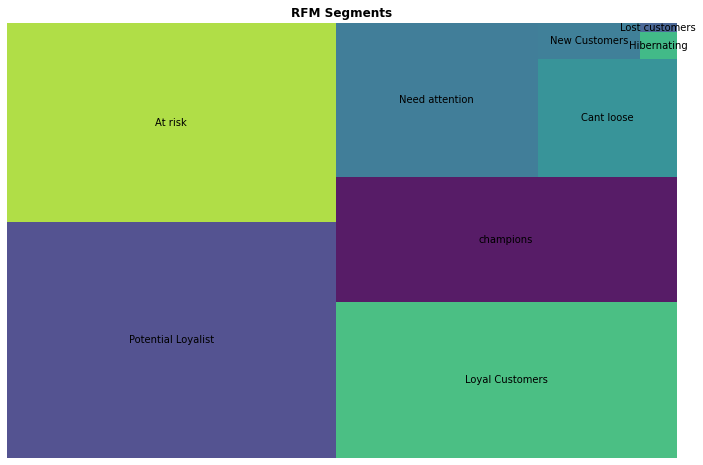

In [0]:
import matplotlib.pyplot as plt
fig=plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
label=['Potential Loyalist','At risk','Loyal Customers','champions','Need attention','Cant loose','New Customers','Hibernating','Lost customers']
squarify.plot(sizes=[1152,975,793,635,465,243,55,15,5],label=label,alpha=0.9)
plt.axis('off')
plt.title("RFM Segments",fontweight="bold")
plt.show()
plt.savefig('Segmentation.png')

In [0]:
%sql 
select count(rfm_Segemts) as No_of_customers,rfm_segemts from rfm_seg_vis group by rfm_segemts order by No_of_customers ASC

No_of_customers,rfm_segemts
5,LostCustomers
15,Hibernating
55,new customers
243,Can't_Loose
465,Need Attention
635,champions
793,Loyal customers
975,At_risk
1152,potential Loyalist


In [0]:
%sql 
select rfm_segemts,mean(Recency), mean(Frequency) from rfm_seg_vis group by rfm_segemts

rfm_segemts,mean(Recency),mean(Frequency)
Loyal customers,29.46153846153846,110.34552332912989
At_risk,211.0102564102564,13.648205128205127
Hibernating,299.73333333333335,2.6666666666666665
Can't_Loose,260.13991769547323,59.650205761316876
Need Attention,110.60860215053764,76.15053763440861
new customers,123.2909090909091,6.8
potential Loyalist,31.092881944444443,26.774305555555557
LostCustomers,288.4,1.0
champions,11.135433070866142,340.00787401574803


In [0]:
%sql 
select rfm_segemts,mean(Monetary) as money from rfm_seg_vis group by rfm_segemts order by money

rfm_segemts,money
LostCustomers,14.4
Hibernating,43.211333333333336
new customers,82.36454545454548
At_risk,570.7593128205134
Can't_Loose,857.2841152263371
potential Loyalist,865.1108159722213
Need Attention,1289.4947956989267
Loyal customers,2270.6248171500642
champions,7471.683606299206


In [0]:
rfm_seg.toPandas().to_csv('rfm_cluster.csv')

In [0]:
rfm_seg1=rfm_seg[['CustomerID','Recency','Frequency','Monetary']]

In [0]:
from pyspark.ml.feature import VectorAssembler

In [0]:
  vector=VectorAssembler(inputCols=['Recency','Frequency','Monetary'],outputCol='rfm')
  vector_data=vector.transform(rfm_seg)

In [0]:
vector_data.show()

+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+
CustomerID|Recency|Frequency|Monetary|R_score|F_score|M_score|RFM_Score| rfm_segemts| rfm|
+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+
 17420| 50| 30| 598.83| 3| 2| 4| 324|potential Loyalist| [50.0,30.0,598.83]|
 16503| 106| 84| 1431.93| 2| 3| 4| 234| Need Attention|[106.0,84.0,1431.93]|
 15727| 16| 302| 5178.96| 4| 4| 4| 444| champions|[16.0,302.0,5178.96]|
 17389| 0| 213|31833.68| 4| 4| 4| 444| champions|[0.0,213.0,31833.68]|
 15447| 330| 9| 155.17| 1| 1| 4| 114| At_risk | [330.0,9.0,155.17]|
 14450| 180| 40| 483.25| 1| 2| 4| 124| Can't_Loose | [180.0,40.0,483.25]|
 15100| 333| 3| 876.0| 1| 1| 4| 114| At_risk | [333.0,3.0,876.0]|
 16916| 23| 143| 576.26| 4| 4| 4| 444| champions| [23.0,143.0,576.26]|
 12471| 2| 460|19824.05| 4| 4| 4| 444| champions|[2.0,460.0,19824.05]|
 14514| 61| 73| 1055.35| 3| 3| 4| 334| Loyal customers| [61.0,73.0,1055.35]|
 16500| 4| 11| 400.86| 4| 1| 4| 414|potential Loyalist| [4.0,11.0,400.86]|
 12626| 23| 294| 6620.48| 4| 4| 4| 444| champions|[23.0,294.0,6620.48]|
 18161| 15| 80| 1618.69| 4| 3| 4| 434| Loyal customers| [15.0,80.0,1618.69]|
 15967| 23| 84| 418.83| 4| 3| 4| 434| Loyal customers| [23.0,84.0,418.83]|
 17809| 16| 61| 5411.91| 4| 3| 4| 434| Loyal customers| [16.0,61.0,5411.91]|
 15738| 18| 173| 4812.42| 4| 4| 4| 444| champions|[18.0,173.0,4812.42]|
 12393| 72| 64| 1582.6| 2| 3| 4| 234| Need Attention| [72.0,64.0,1582.6]|
 16791| 29| 320| 1721.78| 4| 4| 4| 444| champions|[29.0,320.0,1721.78]|
 15296| 50| 194| 3672.86| 3| 4| 4| 344| Loyal customers|[50.0,194.0,3672.86]|
 17708| 187| 35| 267.08| 1| 2| 4| 124| Can't_Loose | [187.0,35.0,267.08]|
+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+
only showing top 20 rows

In [0]:
from pyspark.ml.feature import MinMaxScaler

scaler = MinMaxScaler(inputCol="rfm",\
         outputCol="Total_features")
scalerModel =  scaler.fit(vector_data)
scaledData = scalerModel.transform(vector_data)
scaledData.show(5)

+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+--------------------+
CustomerID|Recency|Frequency|Monetary|R_score|F_score|M_score|RFM_Score| rfm_segemts| rfm| Total_features|
+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+--------------------+
 17420| 50| 30| 598.83| 3| 2| 4| 324|potential Loyalist| [50.0,30.0,598.83]|[0.13404825737265...|
 16503| 106| 84| 1431.93| 2| 3| 4| 234| Need Attention|[106.0,84.0,1431.93]|[0.28418230563002...|
 15727| 16| 302| 5178.96| 4| 4| 4| 444| champions|[16.0,302.0,5178.96]|[0.04289544235924...|
 17389| 0| 213|31833.68| 4| 4| 4| 444| champions|[0.0,213.0,31833.68]|[0.0,0.0270201376...|
 15447| 330| 9| 155.17| 1| 1| 4| 114| At_risk | [330.0,9.0,155.17]|[0.88471849865951...|
+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+--------------------+
only showing top 5 rows

In [0]:
#Clustering
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [0]:
silh_value=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='Total_features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,20):
    kmeans = KMeans(featuresCol='Total_features', k=i)
    model = kmeans.fit(scaledData)
    prediction= model.transform(scaledData)
    silhouette = evaluator.evaluate(prediction)
    silh_value.append(silhouette)
    
    

Out[69]:

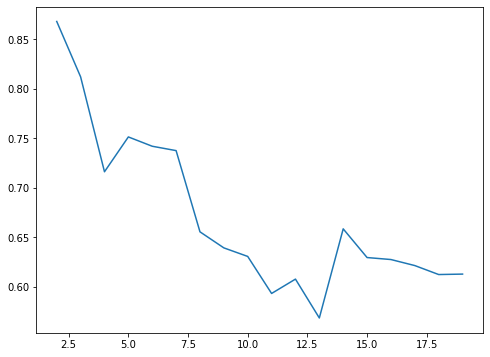

[<matplotlib.lines.Line2D at 0x7f5c3802c8e0>]

In [0]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),silh_value)

In [0]:
k=5
kmeans = KMeans(featuresCol='Total_features').setK(k).setSeed(1)
model = kmeans.fit(scaledData)
# Make predictions
predictions = model.transform(scaledData)
predictions.show(5)

+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+--------------------+----------+
CustomerID|Recency|Frequency|Monetary|R_score|F_score|M_score|RFM_Score| rfm_segemts| rfm| Total_features|prediction|
+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+--------------------+----------+
 17420| 50| 30| 598.83| 3| 2| 4| 324|potential Loyalist| [50.0,30.0,598.83]|[0.13404825737265...| 2|
 16503| 106| 84| 1431.93| 2| 3| 4| 234| Need Attention|[106.0,84.0,1431.93]|[0.28418230563002...| 2|
 15727| 16| 302| 5178.96| 4| 4| 4| 444| champions|[16.0,302.0,5178.96]|[0.04289544235924...| 0|
 17389| 0| 213|31833.68| 4| 4| 4| 444| champions|[0.0,213.0,31833.68]|[0.0,0.0270201376...| 0|
 15447| 330| 9| 155.17| 1| 1| 4| 114| At_risk | [330.0,9.0,155.17]|[0.88471849865951...| 1|
+----------+-------+---------+--------+-------+-------+-------+---------+------------------+--------------------+--------------------+----------+
only showing top 5 rows

In [0]:
M_cluster=predictions[['CustomerID','Recency','Frequency','Monetary','prediction','rfm_segemts']]
M_cluster=M_cluster.withColumnRenamed('Prediction','Cluster')

In [0]:
M_cluster.show()

+----------+-------+---------+--------+-------+------------------+
CustomerID|Recency|Frequency|Monetary|Cluster| rfm_segemts|
+----------+-------+---------+--------+-------+------------------+
 17420| 50| 30| 598.83| 2|potential Loyalist|
 16503| 106| 84| 1431.93| 2| Need Attention|
 15727| 16| 302| 5178.96| 0| champions|
 17389| 0| 213|31833.68| 0| champions|
 15447| 330| 9| 155.17| 1| At_risk |
 14450| 180| 40| 483.25| 3| Can't_Loose |
 15100| 333| 3| 876.0| 1| At_risk |
 16916| 23| 143| 576.26| 0| champions|
 12471| 2| 460|19824.05| 0| champions|
 14514| 61| 73| 1055.35| 2| Loyal customers|
 16500| 4| 11| 400.86| 0|potential Loyalist|
 12626| 23| 294| 6620.48| 0| champions|
 18161| 15| 80| 1618.69| 0| Loyal customers|
 15967| 23| 84| 418.83| 0| Loyal customers|
 17809| 16| 61| 5411.91| 0| Loyal customers|
 15738| 18| 173| 4812.42| 0| champions|
 12393| 72| 64| 1582.6| 2| Need Attention|
 16791| 29| 320| 1721.78| 0| champions|
 15296| 50| 194| 3672.86| 2| Loyal customers|
 17708| 187| 35| 267.08| 3| Can't_Loose |
+----------+-------+---------+--------+-------+------------------+
only showing top 20 rows

In [0]:
M_cluster.groupby('Cluster').agg({'Cluster': 'count'}).show()

+-------+--------------+
Cluster|count(Cluster)|
+-------+--------------+
 1| 507|
 3| 627|
 4| 13|
 2| 1086|
 0| 2105|
+-------+--------------+

In [0]:
M_cluster.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':'mean','Cluster':'count'}).show(5)

+-------+------------------+------------------+------------------+--------------+
Cluster| avg(Recency)| avg(Monetary)| avg(Frequency)|count(Cluster)|
+-------+------------------+------------------+------------------+--------------+
 1| 307.3076923076923| 561.9650690335311|23.429980276134124| 507|
 3| 188.585326953748| 732.3024401913873|35.175438596491226| 627|
 4| 4.0|126118.31000000004|2565.3076923076924| 13|
 2| 79.2219152854512| 1043.72279005525| 52.83517495395949| 1086|
 0|18.631353919239906| 2562.620902612834|129.79667458432303| 2105|
+-------+------------------+------------------+------------------+--------------+

In [0]:
M_cluster.createOrReplaceTempView('Clusters')

In [0]:
%sql
select count(Cluster) as  Customers ,Cluster from Clusters group by Cluster

Customers,Cluster
507,1
627,3
13,4
1086,2
2105,0


In [0]:
%sql
select count(Cluster) as  Customers,mean(Recency),mean(Frequency),mean(Monetary) from Clusters group by Cluster

Customers,mean(Recency),mean(Frequency),mean(Monetary)
507,307.3076923076923,23.429980276134124,561.9650690335311
627,188.585326953748,35.175438596491226,732.3024401913873
13,4.0,2565.3076923076924,126118.31000000004
1086,79.2219152854512,52.83517495395949,1043.72279005525
2105,18.631353919239906,129.79667458432303,2562.620902612834


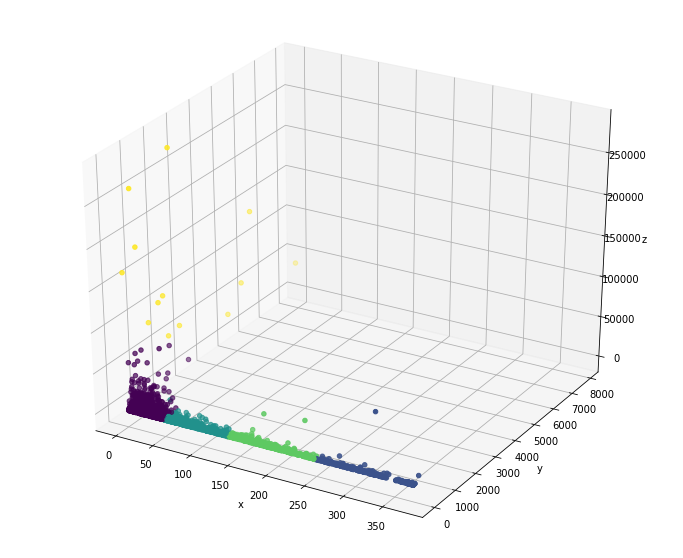

In [0]:
from mpl_toolkits import mplot3d
vis = M_cluster.toPandas().set_index('CustomerID')
vis.head()
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(vis.Recency, vis.Frequency, vis.Monetary, c=vis.Cluster)
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
plt.show()

In [0]:
vector1=VectorAssembler(inputCols=['Recency','Frequency','Monetary'],outputCol='class')
vector1_data=vector1.transform(M_cluster)
vector1_data.show(5)

+----------+-------+---------+--------+-------+------------------+--------------------+
CustomerID|Recency|Frequency|Monetary|Cluster| rfm_segemts| class|
+----------+-------+---------+--------+-------+------------------+--------------------+
 17420| 50| 30| 598.83| 2|potential Loyalist| [50.0,30.0,598.83]|
 16503| 106| 84| 1431.93| 2| Need Attention|[106.0,84.0,1431.93]|
 15727| 16| 302| 5178.96| 0| champions|[16.0,302.0,5178.96]|
 17389| 0| 213|31833.68| 0| champions|[0.0,213.0,31833.68]|
 15447| 330| 9| 155.17| 1| At_risk | [330.0,9.0,155.17]|
+----------+-------+---------+--------+-------+------------------+--------------------+
only showing top 5 rows

In [0]:
vector_2=vector1_data.drop('Recency','Frequency','Monetary')
#vector_21=vector_2.withColumnRenamed('Prediction','Clustering')
vector_21=vector_2.withColumn("Cluster", vector_2["Cluster"].cast(DoubleType()))
vector_21.show(5)

+----------+-------+------------------+--------------------+
CustomerID|Cluster| rfm_segemts| class|
+----------+-------+------------------+--------------------+
 17420| 2.0|potential Loyalist| [50.0,30.0,598.83]|
 16503| 2.0| Need Attention|[106.0,84.0,1431.93]|
 15727| 0.0| champions|[16.0,302.0,5178.96]|
 17389| 0.0| champions|[0.0,213.0,31833.68]|
 15447| 1.0| At_risk | [330.0,9.0,155.17]|
+----------+-------+------------------+--------------------+
only showing top 5 rows

In [0]:
(training,testing) = vector_21.randomSplit([0.7,0.3])

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
# train our model using training data
dt = DecisionTreeClassifier(labelCol="Cluster", featuresCol="class")
model = dt.fit(training)
# test our model and make prdictions using testing data
classification = model.transform(testing)


In [0]:
classification.select('Cluster','prediction').show(5)

+-------+----------+
Cluster|prediction|
+-------+----------+
 2.0| 2.0|
 1.0| 1.0|
 0.0| 0.0|
 0.0| 0.0|
 0.0| 0.0|
+-------+----------+
only showing top 5 rows

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Cluster", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(classification)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

Test Error = 0.014763 
Accuracy = 0.985237

In [0]:
y_true = classification.select(['Cluster']).collect()
y_pred = classification.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

/databricks/python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 _warn_prf(average, modifier, msg_start, len(result))
 precision recall f1-score support

 0.0 0.99 1.00 0.99 606
 1.0 0.94 1.00 0.97 160
 2.0 1.00 0.98 0.99 316
 3.0 1.00 0.94 0.97 204
 4.0 0.00 0.00 0.00 1

 accuracy 0.99 1287
 macro avg 0.78 0.78 0.78 1287
weighted avg 0.99 0.99 0.98 1287

In [0]:
from pyspark.ml.classification import RandomForestClassifier
# train our model using training data
rf = RandomForestClassifier(labelCol="Cluster",featuresCol="class", numTrees=10)
model = rf.fit(training)
# test our model and make predictions using testing data
predictions1 = model.transform(testing)
predictions1.select("prediction", "Cluster").show(5)
# evaluate the performance of the classifier
evaluator = MulticlassClassificationEvaluator(labelCol="Cluster",predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions1)
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

+----------+-------+
prediction|Cluster|
+----------+-------+
 2.0| 2.0|
 1.0| 1.0|
 0.0| 0.0|
 0.0| 0.0|
 0.0| 0.0|
+----------+-------+
only showing top 5 rows

Test Error = 0.014763
Accuracy = 0.985237

In [0]:
y_true = predictions1.select(['Cluster']).collect()
y_pred = predictions1.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

precision recall f1-score support

 0.0 0.99 1.00 0.99 606
 1.0 0.94 1.00 0.97 160
 2.0 1.00 0.98 0.99 316
 3.0 1.00 0.94 0.97 204
 4.0 0.00 0.00 0.00 1

 accuracy 0.99 1287
 macro avg 0.78 0.78 0.78 1287
weighted avg 0.99 0.99 0.98 1287

In [0]:
predictions1.groupby('Cluster').count().show()

+-------+-----+
Cluster|count|
+-------+-----+
 0.0| 606|
 1.0| 160|
 4.0| 1|
 3.0| 204|
 2.0| 316|
+-------+-----+

In [0]:
predictions1.groupby('prediction').count().show()

+----------+-----+
prediction|count|
+----------+-----+
 0.0| 613|
 1.0| 171|
 3.0| 192|
 2.0| 311|
+----------+-----+